## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
#import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df_full = pd.read_csv("data\kc_house_data.csv")
df_CPI =pd.read_csv('./data/CPIAUCSL.csv')

In [4]:
df = df_full[['id', 'sqft_lot', 'sqft_living',
                    'grade', 'condition', 'sqft_basement'
                    , 'bathrooms', 'bedrooms', 'yr_built',
                    'date', 'waterfront', 'view', 'price', 'floors', 'zipcode', 'lat', 'long']]

In [5]:
df_zip = df_full[['zipcode', 'price']]
zipvalues =df_zip.groupby(['zipcode']).mean()
zipvalues = pd.DataFrame(zipvalues)

In [6]:
df_zt = df_full[['id', 'zipcode']]
zip_mult = df_zt.zipcode.replace(df_zip.set_index('zipcode')['price'])


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

def lot_fix(x):
    if x < np.exp(7.5):
        return 1
    elif x < np.exp(10.25):
        return 2
    elif x < np.exp(12):
        return 3
    else:
        return 4

df['lot_type'] = df['sqft_lot'].apply(lot_fix)

In [8]:
zip_mult

0         572000.0
1         467000.0
2         535000.0
3        1010000.0
4        1220000.0
           ...    
21592     360000.0
21593     400000.0
21594     325000.0
21595     400000.0
21596     325000.0
Name: zipcode, Length: 21597, dtype: float64

In [9]:
df = df.drop('zipcode', 1)
df = pd.concat([df, zip_mult], axis=1)
df = df.rename(columns={'zipcode': 'zip_value'})

<AxesSubplot:xlabel='price', ylabel='Count'>

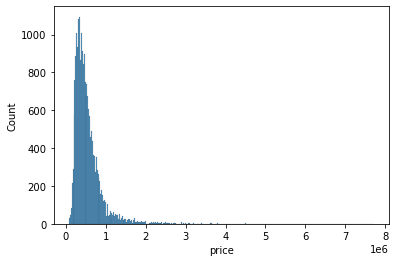

In [10]:
sns.histplot(df.price)

df['lat'] = df['lat'].apply(lambda x: "{:.1f}".format(x)).astype('float64')
df['long'] =df['long'].apply(lambda x: "{:.1f}".format(x)).astype('float64')



locations = locations.pivot_table(index='lat', 
                   columns='long', 
                   values='price', 
                   aggfunc='mean')
ax = sns.heatmap(locations)

In [11]:
df

id  sqft_lot  sqft_living  grade  condition sqft_basement  \
0      7129300520      5650         1180      7          3           0.0   
1      6414100192      7242         2570      7          3         400.0   
2      5631500400     10000          770      6          3           0.0   
3      2487200875      5000         1960      7          5         910.0   
4      1954400510      8080         1680      8          3           0.0   
...           ...       ...          ...    ...        ...           ...   
21592   263000018      1131         1530      8          3           0.0   
21593  6600060120      5813         2310      8          3           0.0   
21594  1523300141      1350         1020      7          3           0.0   
21595   291310100      2388         1600      8          3           0.0   
21596  1523300157      1076         1020      7          3           0.0   

       bathrooms  bedrooms  yr_built        date  waterfront  view     price  \
0           1.00         3      1955  10/13/2014         NaN   0.0  221900.0   
1           2.25         3      1951   12/9/2014         0.0   0.0  538000.0   
2           1.00         2      1933   2/25/2015         0.0   0.0  180000.0   
3           3.00         4      1965   12/9/2014         0.0   0.0  604000.0   
4           2.00         3      1987   2/18/2015         0.0   0.0  510000.0   
...          ...       ...       ...         ...         ...   ...       ...   
21592       2.50         3      2009   5/21/2014         0.0   0.0  360000.0   
21593       2.50         4      2014   2/23/2015         0.0   0.0  400000.0   
21594       0.75         2      2009   6/23/2014         0.0   0.0  402101.0   
21595       2.50         3      2004   1/16/2015         NaN   0.0  400000.0   
21596       0.75         2      2008  10/15/2014         0.0   0.0  325000.0   

       floors      lat     long  zip_value  
0         1.0  47.5112 -122.257   572000.0  
1         2.0  47.7210 -122.319   467000.0  
2         1.0  47.7379 -122.233   535000.0  
3         1.0  47.5208 -122.393  1010000.0  
4         1.0  47.6168 -122.045  1220000.0  
...       ...      ...      ...        ...  
21592     3.0  47.6993 -122.346   360000.0  
21593     2.0  47.5107 -122.362   400000.0  
21594     2.0  47.5944 -122.299   325000.0  
21595     2.0  47.5345 -122.069   400000.0  
21596     2.0  47.5941 -122.299   325000.0  

[21597 rows x 17 columns]

In [12]:
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value= 0)

prestige = sqft_living/sqft_living15
prestige2 =        sqft_lot/sqft_lot15
           

df_loc = df_full[['lat', 'long', 'price']]

fig = px.scatter_mapbox(df_loc, lat='lat', lon='long',          zoom=7, height = 600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

### row 3910

In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [14]:
df_full['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

pq_10 = np.percentile(df['price'], 10)
pq_25 = np.percentile(df['price'], 25)
pq_50 = np.percentile(df['price'], 50)
pq_80 = np.percentile(df['price'], 80)
pq_90 = np.percentile(df['price'], 90)

def price_cats(x):
    if x < pq_10:
        return 1
    elif x < pq_25:
        return 2
    elif x < pq_50:
        return 3
    elif x <pq_80:
        return 5
    elif x< pq_90:
        return 6
    else:
        return 7

df['price_class'] = df['price'].apply(price_cats)


0-7.5
7.5 - 10.25
10.25 - 12
12+

In [15]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [16]:

df['view'] = df['view'].astype(bool).astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [17]:
df.view.value_counts()

0    19485
1     2112
Name: view, dtype: int64

In [18]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object


df['date'] = pd.to_datetime(df['date'], )
df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

# Make Multiplier
df_CPI['Multiplier'] = df_CPI['CPIAUCSL'].iloc[-1] / df_CPI['CPIAUCSL']

In [19]:

df1 = df[df['price'] > np.percentile(df['price'], 99)]

In [20]:
df1

id  sqft_lot  sqft_living  grade  condition  sqft_basement  \
21     2524049179     44867         3050      9          3              1   
153    7855801670     19850         5180     12          3              1   
246    2025069065      8354         3650      9          3              1   
269    7960900060     20100         5050     11          3              1   
282    7424700045      8480         3830      9          5              1   
...           ...       ...          ...    ...        ...            ...   
21352  9533100285      7965         4350     10          3              1   
21451  2311400056      8960         5230     11          3              1   
21490  2524069097    130017         7270     12          3              1   
21514  8964800330     14823         5090     11          3              1   
21560  9253900271     10584         4850     10          3              1   

       bathrooms  bedrooms  yr_built       date  waterfront  view      price  \
21          2.75         3      1968  8/26/2014         0.0     1  2000000.0   
153         3.25         4      2006   4/1/2015         0.0     1  2250000.0   
246         2.50         4      2000  9/29/2014         1.0     1  2400000.0   
269         3.25         4      1982   5/4/2015         0.0     1  2900000.0   
282         3.00         5      1905  5/13/2015         0.0     1  2050000.0   
...          ...       ...       ...        ...         ...   ...        ...   
21352       3.75         4      2013  6/30/2014         0.0     0  2070000.0   
21451       3.50         5      2014  12/1/2014         0.0     0  1990000.0   
21490       6.50         5      2010   5/9/2014         0.0     0  2240000.0   
21514       3.75         4      2013   4/7/2015         0.0     0  3000000.0   
21560       4.50         5      2007   1/7/2015         1.0     1  3570000.0   

       floors      lat     long  zip_value  
21        1.0  47.5316 -122.233  1580000.0  
153       2.0  47.5620 -122.162  1880000.0  
246       1.0  47.6338 -122.072  1220000.0  
269       1.5  47.6312 -122.223  1540000.0  
282       2.0  47.6166 -122.287   747450.0  
...       ...      ...      ...        ...  
21352     2.0  47.6289 -122.205  1540000.0  
21451     2.0  47.5964 -122.201  1540000.0  
21490     2.0  47.5371 -121.982   400000.0  
21514     1.0  47.6200 -122.207  1540000.0  
21560     2.0  47.5943 -122.110  3570000.0  

[214 rows x 17 columns]

df = pd.merge(df, df_CPI,left_on='date', right_on='DATE', how='left')

df['price_adj'] = df['price'] * df['Multiplier']

df['Multiplier'].isna().any()

In [21]:
df.grade.value_counts(normalize=True)

7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

In [22]:
df.grade = df.grade.apply(lambda x: x-3)
df.grade

0        4
1        4
2        3
3        4
4        5
        ..
21592    5
21593    5
21594    4
21595    5
21596    4
Name: grade, Length: 21597, dtype: int64

In [23]:
def gr_fix(x):
    if x < 5:
        return 1
    elif x < 8:
        return 2
    elif x <10:
        return 3
    else:
        return 4

In [24]:
df['grade'] = df['grade'].apply(gr_fix)

In [25]:
df_clean = df
realprice = pd.DataFrame.copy(df['price'])

In [26]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

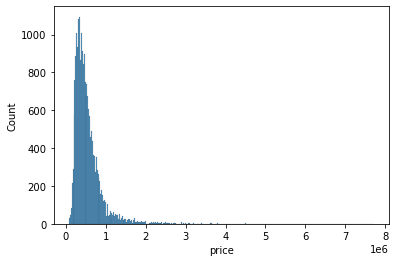

In [27]:
sns.histplot(df['price'])

In [28]:
df[['sqft_lot', 'sqft_living', 'zip_value']] = np.log(df[['sqft_lot', 'sqft_living', 'zip_value']])

#df['sqft_lot'] = np.log(df['sqft_lot'])
#df['sqft_living'] = np.log(df['sqft_living'])
#df['price'] = np.log(df['price'])

In [29]:
#zip_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)
#pc_dummies = pd.get_dummies(df['price_class'], prefix='price_class', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
# = pd.get_dummies(df['lot_type'], prefix ='lot_size' , drop_first= True)   
#view_dummies =pd.get_dummies(df['view'], prefix ='view' , drop_first= True)
df = df.drop([ 'grade', 'condition'], axis=1)



df = pd.concat([df, grade_dummies, cond_dummies], axis=1)


In [30]:
df

id  sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  \
0      7129300520  8.639411     7.073270              1       1.00         3   
1      6414100192  8.887653     7.851661              1       2.25         3   
2      5631500400  9.210340     6.646391              1       1.00         2   
3      2487200875  8.517193     7.580700              1       3.00         4   
4      1954400510  8.997147     7.426549              1       2.00         3   
...           ...       ...          ...            ...        ...       ...   
21592   263000018  7.030857     7.333023              1       2.50         3   
21593  6600060120  8.667852     7.745003              1       2.50         4   
21594  1523300141  7.207860     6.927558              1       0.75         2   
21595   291310100  7.778211     7.377759              1       2.50         3   
21596  1523300157  6.981006     6.927558              1       0.75         2   

       yr_built        date  waterfront  view  ...      lat     long  \
0          1955  10/13/2014         0.0     0  ...  47.5112 -122.257   
1          1951   12/9/2014         0.0     0  ...  47.7210 -122.319   
2          1933   2/25/2015         0.0     0  ...  47.7379 -122.233   
3          1965   12/9/2014         0.0     0  ...  47.5208 -122.393   
4          1987   2/18/2015         0.0     0  ...  47.6168 -122.045   
...         ...         ...         ...   ...  ...      ...      ...   
21592      2009   5/21/2014         0.0     0  ...  47.6993 -122.346   
21593      2014   2/23/2015         0.0     0  ...  47.5107 -122.362   
21594      2009   6/23/2014         0.0     0  ...  47.5944 -122.299   
21595      2004   1/16/2015         0.0     0  ...  47.5345 -122.069   
21596      2008  10/15/2014         0.0     0  ...  47.5941 -122.299   

       zip_value  grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0      13.256894        0        0        0       0       1       0       0  
1      13.054085        0        0        0       0       1       0       0  
2      13.190022        0        0        0       0       1       0       0  
3      13.825461        0        0        0       0       0       0       1  
4      14.014361        1        0        0       0       1       0       0  
...          ...      ...      ...      ...     ...     ...     ...     ...  
21592  12.793859        1        0        0       0       1       0       0  
21593  12.899220        1        0        0       0       1       0       0  
21594  12.691580        0        0        0       0       1       0       0  
21595  12.899220        1        0        0       0       1       0       0  
21596  12.691580        0        0        0       0       1       0       0  

[21597 rows x 22 columns]

In [31]:
df = df.drop(['id', 'date'], axis= 1)

In [32]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [sqft_lot, sqft_living, sqft_basement, bathrooms, bedrooms, yr_built, waterfront, view, price, floors, lat, long, zip_value, grade_2, grade_3, grade_4, cond_2, cond_3, cond_4, cond_5]
Index: []

In [33]:
price_log = np.log(df.price)
price_log = pd.DataFrame(price_log)

In [34]:
df.sqft_basement.describe()

count    21597.000000
mean         0.978979
std          0.143459
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sqft_basement, dtype: float64

In [35]:
scaler = StandardScaler()
scalerp = StandardScaler()
df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'lat', 'long', 'zip_value']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'lat', 'long', 'zip_value']])

df['price'] = scalerp.fit_transform(price_log)


In [36]:
scalerp

StandardScaler()

In [37]:
df.waterfront = df.waterfront.fillna(0)

df = df.drop('DATE', 1)

In [38]:
df

sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  yr_built  \
0     -0.388439    -1.125582              1  -1.451073 -0.402903      1955   
1     -0.113243     0.709463              1   0.174486 -0.402903      1951   
2      0.244481    -2.131943              1  -1.451073 -1.482493      1933   
3     -0.523926     0.070676              1   1.149821  0.676687      1965   
4      0.008140    -0.292732              1  -0.150626 -0.402903      1987   
...         ...          ...            ...        ...       ...       ...   
21592 -2.171645    -0.513218              1   0.499597 -0.402903      2009   
21593 -0.356909     0.458017              1   0.499597  0.676687      2014   
21594 -1.975424    -1.469095              1  -1.776184 -1.482493      2009   
21595 -1.343145    -0.407754              1   0.499597 -0.402903      2004   
21596 -2.226909    -1.469095              1  -1.776184 -1.482493      2008   

       waterfront  view     price  floors       lat      long  zip_value  \
0             0.0     0 -1.402030     1.0 -0.352894 -0.305695   0.036128   
1             0.0     0  0.279945     2.0  1.161376 -0.746286  -0.340662   
2             0.0     0 -1.799472     1.0  1.283355 -0.135144  -0.088111   
3             0.0     0  0.499710     1.0 -0.283604 -1.272151   1.092438   
4             0.0     0  0.178438     1.0  0.409293  1.200840   1.443386   
...           ...   ...       ...     ...       ...       ...        ...   
21592         0.0     0 -0.483060     3.0  1.004752 -0.938156  -0.824120   
21593         0.0     0 -0.282961     2.0 -0.356503 -1.051856  -0.628377   
21594         0.0     0 -0.273012     2.0  0.247617 -0.604160  -1.014139   
21595         0.0     0 -0.282961     2.0 -0.184722  1.030289  -0.628377   
21596         0.0     0 -0.677306     2.0  0.245452 -0.604160  -1.014139   

       grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0            0        0        0       0       1       0       0  
1            0        0        0       0       1       0       0  
2            0        0        0       0       1       0       0  
3            0        0        0       0       0       0       1  
4            1        0        0       0       1       0       0  
...        ...      ...      ...     ...     ...     ...     ...  
21592        1        0        0       0       1       0       0  
21593        1        0        0       0       1       0       0  
21594        0        0        0       0       1       0       0  
21595        1        0        0       0       1       0       0  
21596        0        0        0       0       1       0       0  

[21597 rows x 20 columns]

In [39]:
X = df.drop('price', 1)
y =df['price']

In [40]:
df.lat

0       -0.352894
1        1.161376
2        1.283355
3       -0.283604
4        0.409293
           ...   
21592    1.004752
21593   -0.356503
21594    0.247617
21595   -0.184722
21596    0.245452
Name: lat, Length: 21597, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [42]:
hicor =X_train.corr().abs().unstack()
pp =hicor.sort_values(kind="quicksort").drop_duplicates()
print(pp)

sqft_basement  cond_3           0.000257
view           sqft_basement    0.000557
sqft_basement  cond_2           0.001042
               grade_2          0.001786
bedrooms       cond_3           0.001902
                                  ...   
bathrooms      bedrooms         0.509231
sqft_living    bedrooms         0.616354
               bathrooms        0.762086
cond_4         cond_3           0.814471
sqft_lot       sqft_lot         1.000000
Length: 172, dtype: float64


In [43]:
X_train

sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  yr_built  \
15615  0.359872     0.266765              1  -0.475738  0.676687      1952   
7283   0.199227    -0.237259              1   0.174486 -0.402903      1967   
18169  1.825734     2.061283              1   1.800044  0.676687      1995   
13170  0.003052    -0.264832              1  -0.150626  0.676687      1954   
4743  -1.269946     0.187988              1   0.499597 -0.402903      2001   
...         ...          ...            ...        ...       ...       ...   
4023   0.276818     0.385474              1  -0.150626  0.676687      1948   
7259   0.133332    -0.210005              1  -0.800849 -0.402903      1956   
21584  0.009237     2.014288              1   2.125156  1.756277      2008   
3775   3.154812     0.606336              1   0.499597 -0.402903      1977   
10137 -0.119691    -0.861267              1  -0.475738 -0.402903      1977   

       waterfront  view  floors       lat      long  zip_value  grade_2  \
15615         0.0     0     1.0 -0.701509 -1.009219  -0.999902        0   
7283          0.0     0     1.0  0.707384  0.625230   0.964897        0   
18169         0.0     0     2.0 -0.008611  0.696293   2.246758        1   
13170         0.0     0     1.0 -0.608400 -0.525990  -0.958113        0   
4743          0.0     0     2.0  0.202146  0.348084   0.612348        1   
...           ...   ...     ...       ...       ...        ...      ...   
4023          0.0     0     1.0  0.415789 -0.021443   1.876137        1   
7259          0.0     0     1.0  1.299956 -0.291483  -0.088111        0   
21584         0.0     0     2.0  0.519724  0.099364   1.876137        0   
3775          0.0     0     2.0 -0.742649  1.470879  -0.628377        1   
10137         0.0     0     1.0  1.255928 -0.163569  -0.088111        0   

       grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
15615        0        0       0       1       0       0  
7283         0        0       0       0       1       0  
18169        0        0       0       1       0       0  
13170        0        0       0       1       0       0  
4743         0        0       0       1       0       0  
...        ...      ...     ...     ...     ...     ...  
4023         0        0       0       0       0       1  
7259         0        0       0       1       0       0  
21584        1        0       0       1       0       0  
3775         0        0       0       0       1       0  
10137        0        0       0       0       1       0  

[17277 rows x 19 columns]

In [44]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train , predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2835.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:26:15   Log-Likelihood:                -12301.
No. Observations:               17277   AIC:                         2.464e+04
Df Residuals:                   17257   BIC:                         2.480e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4718      0.374     30.706      0.000      10.740      12.204
sqft_lot         -0.0003      0.005     -0.066      0.947      -0.010       0.009
sqft_living       0.4492      0.008     59.593      0.000       0.434       0.464
sqft_basement    -0.0291      0.026     -1.117      0.264      -0.080       0.022
bathrooms         0.1103      0.007     16.351      0.000       0.097       0.124
bedrooms         -0.0757      0.005    -15.458      0.000      -0.085      -0.066
yr_built         -0.0063      0.000    -34.273      0.000      -0.007      -0.006
waterfront        0.8696      0.047     18.438      0.000       0.777       0.962
view              0.3533      0.014     25.426      0.000       0.326       0.380
floors            0.1700      0.009     18.025      0.000       0.152       0.189
lat               0.3072      0.004     71.847      0.000       0.299       0.316
long             -0.0523      0.005    -10.828      0.000      -0.062      -0.043
zip_value         0.1893      0.004     42.412      0.000       0.181       0.198
grade_2           0.3649      0.010     35.346      0.000       0.345       0.385
grade_3           1.0050      0.030     33.823      0.000       0.947       1.063
grade_4           1.7899      0.158     11.334      0.000       1.480       2.099
cond_2            0.2603      0.112      2.332      0.020       0.042       0.479
cond_3            0.5631      0.103      5.450      0.000       0.361       0.766
cond_4            0.6160      0.103      5.962      0.000       0.413       0.819
cond_5            0.7317      0.104      7.039      0.000       0.528       0.935
==============================================================================
Omnibus:                      296.589   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.410
Skew:                           0.125   Prob(JB):                    2.98e-115
Kurtosis:                       3.819   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
df2 = df.drop(['sqft_lot', 'sqft_basement', 'long', 'yr_built'], 1)


In [188]:
X2 = df2.drop('price', 1)
y2 =df2['price']

In [189]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=11)

In [190]:
predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2 , predictors).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3162.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:07   Log-Likelihood:                -13121.
No. Observations:               17277   AIC:                         2.627e+04
Df Residuals:                   17261   BIC:                         2.640e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8003      0.109     -7.358      0.000      -1.013      -0.587
sqft_living     0.4480      0.007     60.410      0.000       0.434       0.463
bathrooms       0.0348      0.007      5.186      0.000       0.022       0.048
bedrooms       -0.0548      0.005    -10.745      0.000      -0.065      -0.045
waterfront      0.9413      0.049     19.079      0.000       0.845       1.038
view            0.4578      0.014     32.046      0.000       0.430       0.486
floors          0.0986      0.009     10.786      0.000       0.081       0.116
lat             0.3624      0.004     86.446      0.000       0.354       0.371
zip_value       0.1486      0.004     33.876      0.000       0.140       0.157
grade_2         0.3145      0.011     29.433      0.000       0.294       0.335
grade_3         0.9932      0.031     32.055      0.000       0.932       1.054
grade_4         1.9826      0.165     11.983      0.000       1.658       2.307
cond_2          0.1757      0.117      1.501      0.133      -0.054       0.405
cond_3          0.3784      0.108      3.498      0.000       0.166       0.590
cond_4          0.5163      0.108      4.770      0.000       0.304       0.729
cond_5          0.7098      0.109      6.517      0.000       0.496       0.923
==============================================================================
Omnibus:                      451.398   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.693
Skew:                           0.315   Prob(JB):                    3.28e-129
Kurtosis:                       3.653   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='price', ylabel='Count'>

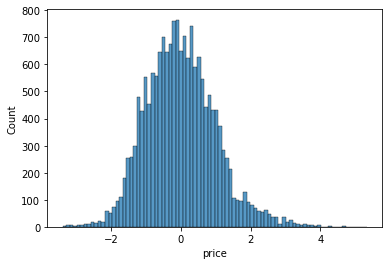

In [191]:
sns.histplot(y_train)

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_1= LinearRegression()
model_1.fit(X_train, y_train)

# make predictions
y_hat = model_1.predict(X_train)



In [193]:
model_2= LinearRegression()
model_2.fit(X_train2, y_train2)

# make predictions
y_hat2 = model_2.predict(X2)

In [194]:
features = X_train
label = y_train

In [195]:


scores = cross_val_score(
            model_1, 
            features,
            label,
            cv=8,
            scoring="neg_mean_squared_error")



rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

0.49404274359192846

In [196]:
scores

array([-0.23783967, -0.23549713, -0.23737696, -0.24504224, -0.25718773,
       -0.24135194, -0.24138606, -0.25747439])

In [197]:
display(model_1)


LinearRegression()

In [198]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.48768809, 0.48528046, 0.48721346, 0.49501741, 0.5071368 ,
       0.49127583, 0.49131055, 0.50741935])

0.49404274359192846

0.008141380722473406

In [199]:


scores2 = cross_val_score(
            model_1, 
            X_test,
            y_test,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores2 = np.sqrt(-scores2)

In [200]:
scores2

array([-0.23114123, -0.22483676, -0.23500775, -0.22783357, -0.23620094,
       -0.25229842, -0.25107286, -0.24796526])

In [201]:
display(rmse_scores2)
display(rmse_scores2.mean())
display(rmse_scores2.std())

array([0.4807715 , 0.47416955, 0.48477598, 0.47731915, 0.48600508,
       0.50229316, 0.50107171, 0.4979611 ])

0.48804590439773954

0.010285657050142654

In [202]:
df = pd.DataFrame(df)

In [203]:
df

sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  yr_built  \
0     -0.388439    -1.125582              1  -1.451073 -0.402903      1955   
1     -0.113243     0.709463              1   0.174486 -0.402903      1951   
2      0.244481    -2.131943              1  -1.451073 -1.482493      1933   
3     -0.523926     0.070676              1   1.149821  0.676687      1965   
4      0.008140    -0.292732              1  -0.150626 -0.402903      1987   
...         ...          ...            ...        ...       ...       ...   
21592 -2.171645    -0.513218              1   0.499597 -0.402903      2009   
21593 -0.356909     0.458017              1   0.499597  0.676687      2014   
21594 -1.975424    -1.469095              1  -1.776184 -1.482493      2009   
21595 -1.343145    -0.407754              1   0.499597 -0.402903      2004   
21596 -2.226909    -1.469095              1  -1.776184 -1.482493      2008   

       waterfront  view     price  floors       lat      long  zip_value  \
0             0.0     0 -1.402030     1.0 -0.352894 -0.305695   0.036128   
1             0.0     0  0.279945     2.0  1.161376 -0.746286  -0.340662   
2             0.0     0 -1.799472     1.0  1.283355 -0.135144  -0.088111   
3             0.0     0  0.499710     1.0 -0.283604 -1.272151   1.092438   
4             0.0     0  0.178438     1.0  0.409293  1.200840   1.443386   
...           ...   ...       ...     ...       ...       ...        ...   
21592         0.0     0 -0.483060     3.0  1.004752 -0.938156  -0.824120   
21593         0.0     0 -0.282961     2.0 -0.356503 -1.051856  -0.628377   
21594         0.0     0 -0.273012     2.0  0.247617 -0.604160  -1.014139   
21595         0.0     0 -0.282961     2.0 -0.184722  1.030289  -0.628377   
21596         0.0     0 -0.677306     2.0  0.245452 -0.604160  -1.014139   

       grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0            0        0        0       0       1       0       0  
1            0        0        0       0       1       0       0  
2            0        0        0       0       1       0       0  
3            0        0        0       0       0       0       1  
4            1        0        0       0       1       0       0  
...        ...      ...      ...     ...     ...     ...     ...  
21592        1        0        0       0       1       0       0  
21593        1        0        0       0       1       0       0  
21594        0        0        0       0       1       0       0  
21595        1        0        0       0       1       0       0  
21596        0        0        0       0       1       0       0  

[21597 rows x 20 columns]

In [204]:
y_hat = model_2.predict(X2)
y_hatty = y_hat

In [205]:
y_hat = scalerp.inverse_transform(y_hat)

y_hat = np.exp(y_hat)
y_hat

array([277334.51638385, 601404.77275872, 305361.6955213 , ...,
       285357.92921368, 414832.77502218, 285240.04681212])

In [206]:
scores3 = cross_val_score(
            model_2, 
            X_train2,
            y_train2,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores3 = np.sqrt(-scores3)

In [207]:
rmse_scores3.mean()

0.517715193145492

In [208]:
realprice

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [209]:
resids = y_hat - realprice

In [210]:
resids

0         55434.516384
1         63404.772759
2        125361.695521
3       -114085.806683
4         16694.378347
             ...      
21592    166665.516146
21593     77312.487566
21594   -116743.070786
21595     14832.775022
21596    -39759.953188
Name: price, Length: 21597, dtype: float64

In [211]:
print(y_hat[3910])
print(realprice[3910])

4834808.703311931
7060000.0


<AxesSubplot:xlabel='price', ylabel='Count'>

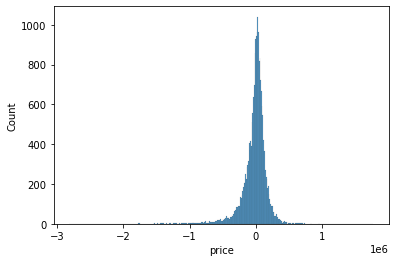

In [212]:
sns.histplot(resids)

In [213]:
resids.describe()

count    2.159700e+04
mean    -2.099970e+04
std      1.992295e+05
min     -2.818342e+06
25%     -7.687036e+04
50%      7.790994e+03
75%      7.239400e+04
max      1.766951e+06
Name: price, dtype: float64

In [214]:
(abs(resids).mean())/(realprice.mean())

0.21990287996968225

In [215]:
realprice.mean()

540296.5735055795

In [216]:
resids.sort_values()

1446    -2.818342e+06
8629    -2.762671e+06
7245    -2.597979e+06
12358   -2.340130e+06
3910    -2.225191e+06
             ...     
21034    1.346306e+06
15654    1.566463e+06
6035     1.578212e+06
14542    1.661406e+06
13398    1.766951e+06
Name: price, Length: 21597, dtype: float64

In [217]:
resids.shape

(21597,)

In [218]:
realprice.shape

(21597,)

<AxesSubplot:ylabel='price'>

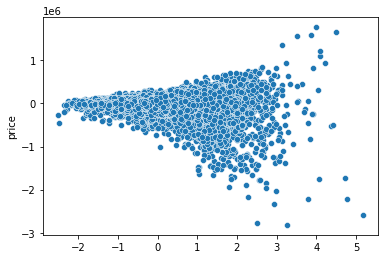

In [219]:
sns.scatterplot(x=model_1.predict(X), y=resids)

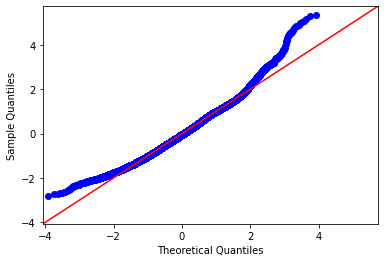

In [220]:
import scipy.stats as stats
fig = sm.graphics.qqplot(y_hatty, dist=stats.norm, line='45', fit=True)


<AxesSubplot:xlabel='price', ylabel='Count'>

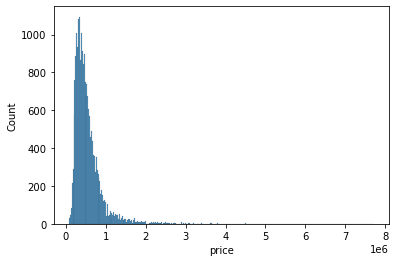

In [221]:
sns.histplot(df_full['price'])

In [222]:
df_full.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [223]:


cv_5_results  = np.mean(cross_val_score(model_2, X2, y2, cv=5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_2, X2, y2, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_2, X2, y2, cv=20, scoring='r2'))

In [224]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)


0.7330447677226244
0.7323963976545944
0.7324789121787352
